### 前準備

In [1]:
import sklearn
import warnings
warnings.simplefilter('ignore')

import pandas as pd # データ分析用のライブラリ
import numpy as np  # 数値計算用のライブラリ
import matplotlib.pyplot as plt # 図の描画用のライブラリ
import seaborn as sns # データ可視化ライブラリ

%matplotlib inline
dir_name = '/opt/local/lectures/yoshino/share/dentsu2024/' # 今回はここに入っています

# 視聴率データ
file1_path = dir_name + 'rate_kanto.tsv'
file2_path = dir_name + 'rate_nagoya.tsv'
file3_path = dir_name + 'rate_kansai.tsv'

# 電子番組表データ
file4_path = dir_name + 'EPG_kanto.tsv'
file5_path = dir_name + 'EPG_nagoya.tsv'
file6_path = dir_name + 'EPG_kansai.tsv'

In [2]:
df_rate_kanto = pd.read_table(file1_path)
df_rate_nagoya = pd.read_table(file2_path)
df_rate_kansai = pd.read_table(file3_path)
df_EPG_kanto = pd.read_table(file4_path)
df_EPG_nagoya = pd.read_table(file5_path)
df_EPG_kansai = pd.read_table(file6_path)

In [3]:
df_rate_kanto['broadcast_start_date_new'] = pd.to_datetime(df_rate_kanto['broadcast_start_date'])
df_rate_nagoya['broadcast_start_date_new'] = pd.to_datetime(df_rate_nagoya['broadcast_start_date'])
df_rate_kansai['broadcast_start_date_new'] = pd.to_datetime(df_rate_kansai['broadcast_start_date'])

In [4]:
# 番組開始の年月日と時間、曜日を抽出
for i in [df_rate_kanto,df_rate_nagoya,df_rate_kansai]:
    i['year'] = i['broadcast_start_date_new'].dt.year
    i['month'] = i['broadcast_start_date_new'].dt.month
    i['day'] = i['broadcast_start_date_new'].dt.day
    i['hour'] = i['broadcast_start_date_new'].dt.hour
    i["minute"] = i["broadcast_start_date_new"].dt.minute
    i['dayofweek'] = i['broadcast_start_date_new'].dt.dayofweek

In [5]:
df_rate_kanto['broadcast_end_date_new'] = pd.to_datetime(df_rate_kanto['broadcast_end_date'])
df_rate_nagoya['broadcast_end_date_new'] = pd.to_datetime(df_rate_nagoya['broadcast_end_date'])
df_rate_kansai['broadcast_end_date_new'] = pd.to_datetime(df_rate_kansai['broadcast_end_date'])
# 番組開始の年月日と時間、曜日を抽出
for i in [df_rate_kanto,df_rate_nagoya,df_rate_kansai]:
    i['end_year'] = i['broadcast_end_date_new'].dt.year
    i['end_month'] = i['broadcast_end_date_new'].dt.month
    i['end_day'] = i['broadcast_end_date_new'].dt.day
    i['end_hour'] = i['broadcast_end_date_new'].dt.hour
    i["end_minute"] = i["broadcast_end_date_new"].dt.minute
    i['end_dayofweek'] = i['broadcast_end_date_new'].dt.dayofweek

In [6]:
#ヒートマップ用の配列作成
heat_week = []
for j in range(24):
    heat_hour = [] #曜日別各時間の視聴率の配列を時間ごとに初期化
    for i in range(7):
        heat_hour.append(df_rate_kanto['setai'][df_rate_kanto['dayofweek']==i][df_rate_kanto['hour']==j].mean())
        #曜日時間別視聴率の平均の取得
    heat_week.append(heat_hour)

In [7]:
nhk = df_rate_kanto[df_rate_kanto['media'].str.contains('NHK総合')]

In [8]:
ntv = df_rate_kanto[df_rate_kanto['media'].str.contains('日本テレビ')]
ex = df_rate_kanto[df_rate_kanto['media'].str.contains('テレビ朝日')]
tx = df_rate_kanto[df_rate_kanto['media'].str.contains('テレビ東京')]
cx = df_rate_kanto[df_rate_kanto['media'].str.contains('フジテレビ')]
tbs = df_rate_kanto[df_rate_kanto['media'].str.contains('TBS')]

In [9]:
#マツコ 20:57~22:00のデータ抽出
matsuko_gen_kanto=tbs[tbs['dayofweek']==1][tbs['hour']==20][tbs["minute"]==57][tbs["end_hour"]==22][tbs["end_minute"]==0][tbs["title"].str.contains("マツコ")]

### 電子とがっちゃんこ

In [10]:
# マージしたい列（'id', 'synopsis', 'description'）を選択して結合
matsuko_gen_kanto = pd.merge(
    matsuko_gen_kanto, 
    df_EPG_kanto[['id', 'synopsis', 'description']],  # 必要な列のみ選択
    on='id',  # 'id'列を基準にマージ
    how='left'  # 'left'結合でmatsuko_genの全ての行を保持
)

# 結果の確認
matsuko_gen_kanto.head()


,id,sub_id,broadcast_start_date,broadcast_end_date,media,title,setai,kozin,child,teen,...,dayofweek,broadcast_end_date_new,end_year,end_month,end_day,end_hour,end_minute,end_dayofweek,synopsis,description
0,2018011604205700,0,2018-01-16 20:57:00,2018-01-16 22:00:00,TBS,マツコの知らない世界[字]【街の名店デリバリー&梅干し!大物2世熱弁もマツコ唖然】,12.903175,7.780952,7.106349,7.141270,...,1,2018-01-16 22:00:00,2018,1,16,22,0,1,大手だけじゃない!街の名店デリバリーグルメ!マツコ感動爆食い▼梅干の世界!1000年の歴史を...,番組内容 -- ▼デリバリーグルメの世界第2弾!今回は個人店デリバリー…オーダーして○○分で...
1,2018012304205700,0,2018-01-23 20:57:00,2018-01-23 22:00:00,TBS,マツコの知らない世界[字]【みかんの世界&プラレール旅行の世界】,11.698413,7.542857,5.677778,8.606349,...,1,2018-01-23 22:00:00,2018,1,23,22,0,1,みかんの世界!全国のみかん農家をめぐる東大生登場!▼プラレール旅行の世界!プラレールで作った...,番組内容 -- シーズン到来!みかんの世界!全国のみかん農家を巡る東大生が偏差値75の絶品み...
2,2018013004205700,0,2018-01-30 20:57:00,2018-01-30 22:00:00,TBS,マツコの知らない世界[字]【日本茶の世界&奥深い紙袋の世界】,12.068254,6.539683,3.985714,3.600000,...,1,2018-01-30 22:00:00,2018,1,30,22,0,1,日本にたった13人!日本茶界を牽引する茶師が厳選…激ウマ茶!今、ブームは九州？▼紙袋の世界!...,番組内容 -- 今世界で大ブーム!日本茶の世界!日本にたった13人!日本茶界を牽引する茶師十...
3,2018020604205700,0,2018-02-06 20:57:00,2018-02-06 22:00:00,TBS,マツコの知らない世界[字]【寒い冬にほっこり!おうちコーヒーの世界&片手袋の世界】,13.087302,7.373016,3.369841,6.217460,...,1,2018-02-06 22:00:00,2018,2,6,22,0,1,おうちコーヒーの世界!世界一の焙煎士が登場!喫茶店やカフェに行かなくてもおうちでおいしいコー...,番組内容 -- 寒い冬にほっこり!冬を楽しむ二本立て▼おうちコーヒーの世界!カフェや喫茶店に...
4,2018021304205700,0,2018-02-13 20:57:00,2018-02-13 22:00:00,TBS,マツコの知らない世界[字]【最強の麺類!ちゃんぽんの世界&劇的進化!公園遊具の世界】,10.842857,6.477778,6.938095,3.561905,...,1,2018-02-13 22:00:00,2018,2,13,22,0,1,麺類のチャンピオン!ちゃんぽんの世界!長崎だけじゃない!全国厳選8店&取材NG…幻の名店大公...,番組内容 -- 最強の麺類!ちゃんぽんの世界!誰よりもちゃんぽんを愛するちゃんぽん番長が絶品...


In [11]:
len(matsuko_gen_kanto)

177

### ベクトル化

In [12]:
!pip install -U tqdm 
!pip install --upgrade sentence-transformers --user
!pip install --upgrade scikit-learn --user
!pip install --upgrade torch --user
!pip install -U torch 
!pip install -U fugashi
!pip install -U unidic-lite
!pip install neologdn

In [13]:
matsuko = matsuko_gen_kanto

#### descriptionの前処理

In [14]:
# descriptionの前処理は必要
# 現状は番組詳細などの文字を消去できていない
matsuko["description"][6]

'番組内容 -- ▼今ひそかなブーム!間借りカレーの世界!昼だけ間借りしてるカレーが実はめちゃくちゃ美味しいってなんで？パクチー？酢飯？個性的なカレーたちにマツコの食べる手も止まらない!▼懐かしくて書きたくなる鉛筆の世界!書き味おすすめからいい匂いの鉛筆まで!？様々な角度からおすすめの鉛筆を紹介!そして鉛筆を使って演奏…？   -- 出演者 -- 【MC】  マツコ・デラックス    【ゲスト】  間借りカレーの世界…縫田曉言さん  鉛筆の世界…小日向京さん -- 公式ページ -- ◇番組HP http://www.tbs.co.jp/matsuko-sekai/   -- おしらせ -- 【公式facebook】  https://ja-jp.facebook.com/matsuko.sekai   -- おしらせ2 -- 【公式Twitter】  @tbsmatsukosekai  https://twitter.com/tbsmatsukosekai   -- おことわり -- 番組の内容と放送時間は変更になる可能性があります。'

In [15]:
import re
import neologdn

# '番組内容' と '出演者' 以降を削除
def clean_description(text):
    text = re.split(r'-- 出演者 --', text)[0]  # '出演者' 以降を削除
    text = re.sub(r'番組内容\s*', '', text)  # '番組内容' という文字列を削除
    text = neologdn.normalize(text)
    return text.strip()

# 各行に対してクリーンアップ処理を実行
matsuko['description'] = matsuko['description'].apply(clean_description)


In [32]:
matsuko["description"][2]

'今世界で大ブーム日本茶の世界日本にたった13人日本茶界を牽引する茶師十段位が厳選毎日飲みたくなる、ほっとする美味しい日本茶マツコも和む紙袋の世界使い捨てなんてもったいない紙袋は今、おしゃれアイテムとして進化を遂げていた3000種類の紙袋を集めた日本唯一の紙袋専門デザイナーが普段から使える最新おしゃれ紙袋を続々紹介'

#### ベクトル化(SimCSE)

### 学習

In [16]:
import pandas as pd
matsuko = pd.read_csv("matsuko_embeddings_SimCSE.csv")

In [17]:
# 平均じゃなくする
import ast
# 文字列をリストに変換する関数
def parse_embedding(embedding_str):
    # スペースで区切られた数値を適切にカンマで区切り、リスト形式に変換
    # リストのカンマの位置を修正
    corrected_str = re.sub(r'(\d)(-)', r'\1, \2', embedding_str)  # 数値とマイナス記号の間にカンマを追加
    corrected_str = corrected_str.replace(' ', ',').replace(',,', ',')  # 連続するカンマを修正
    corrected_str = corrected_str.replace('[,', '[').replace(',]', ']')  # リストの先頭と末尾のカンマを修正
        
    # リストを評価
    embedding_list = ast.literal_eval(corrected_str)
    return np.array(embedding_list)

matsuko['embedding'] = matsuko['embedding'].apply(parse_embedding)

In [35]:
print(matsuko["embedding"][1])

[ 4.66459513e-01  2.90659994e-01  2.57077198e-02  9.31334198e-01
 -1.06254375e+00 -4.86917257e-01  3.74838203e-01 -4.45631176e-01
 -8.67609262e-01  6.53038681e-01 -6.43458068e-01  9.89070833e-02
 -1.30821928e-01  4.89921391e-01  2.61288047e-01  2.25226507e-01
  9.24054682e-01  4.71758306e-01 -2.59726226e-01  4.12652120e-02
 -1.96713984e-01 -9.47082818e-01 -5.52756906e-01 -1.05981030e-01
 -3.95313561e-01 -1.13792397e-01 -1.47208959e-01 -6.45684898e-01
  1.25741452e-01  1.44255474e-01 -1.02845049e+00 -3.45433980e-01
  1.46087304e-01 -6.27818775e+00  9.75540429e-02 -4.95163083e-01
 -8.23811829e-01  5.91339990e-02 -2.90685236e-01  5.89854479e-01
 -2.46955436e-02  4.27576035e-01  6.72140181e-01  5.88472068e-01
  4.19022083e-01 -9.88312900e-01  6.50884807e-01  3.97146791e-01
  2.72773895e-02 -1.15896118e+00 -7.01824874e-02  6.88588762e+00
  4.23032939e-01  6.26733363e-01  7.53072441e-01  9.12521303e-01
 -2.26172879e-02  3.65591228e-01  9.32407320e-01  9.18398917e-01
  2.09315926e-01 -5.15163

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = matsuko["embedding"].tolist()
y = matsuko["setai"]
y = np.array(y)

# 標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [19]:
# 線形回帰
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error

# テストデータで予測を実行
y_pred = lr.predict(X_test)

# 平均二乗誤差 (MSE) を計算
mse = mean_squared_error(y_test, y_pred)

print("実際の値", y_test)
# 予測結果の表示
print('予測値:', y_pred)

# MSEを表示
print('平均二乗誤差 (MSE): {:.3f}'.format(mse))

実際の値 [ 9.9047619   8.6047619   8.9047619  10.40634921  9.19047619  9.69365079
 13.57142857 10.62539683  8.85396825 10.44603175  9.25079365  9.18571429
 11.26825397 11.94761905  7.85238095 12.02698413 12.47460317 13.50952381
 11.86666667  8.62539683  9.02698413  9.39206349 10.84285714  8.04285714
  9.28571429 10.44444444 10.11111111  9.9031746   9.84444444  9.94444444
  9.17301587 10.76031746  8.37619048  9.11111111 12.08253968  8.86507937]
予測値: [13.93344821 10.08661571 12.74341346 11.56571385  7.87382419  9.56571655
 10.92484278  9.46948253 10.52765501 10.978505    7.97766273 10.34168345
 11.59013205 11.31477799  8.38049825  9.45169573 10.08146021 13.1121728
 10.5792672  11.8464164  11.3537302  11.10003037 10.66981678  9.19456216
 10.87895664  8.75860811 12.97304153 13.24826612 10.66220866 11.06741748
 14.02348564 11.76829169  9.25657657 11.37549704 11.53745199  8.3154647 ]
平均二乗誤差 (MSE): 3.983


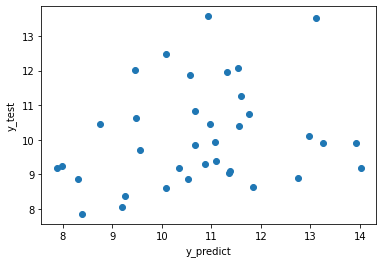

In [21]:
import matplotlib.pyplot as plt # 図の描画用のライブラリ
import seaborn as sns # データ可視化ライブラリ

# Jupyter notebook上に図表を表示する設定
%matplotlib inline

plt.xlabel("y_predict")
plt.ylabel("y_test")
plt.scatter(y_pred, y_test)
plt.savefig("tbs_plot.png",bbox_inches='tight')
plt.show()

In [22]:
# 相関係数を計算
correlation_coefficient = np.corrcoef(y_pred, y_test)[0, 1]
print(correlation_coefficient)

0.23167277217091128


#### 全部比較

In [23]:
from sklearn.linear_model import LinearRegression # 線形回帰
from sklearn.linear_model import Ridge # リッジ回帰
from sklearn.linear_model import Lasso # ラッソ回帰 
from sklearn.linear_model import ElasticNet # エラスティックネット，リッジ回帰とLasso回帰の折衷案
from sklearn.tree import DecisionTreeRegressor # 決定木
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト
from sklearn.ensemble import AdaBoostRegressor # ブースティング（Adaboost）

from sklearn.metrics import mean_absolute_error

from tqdm import tqdm

reg_names = ['Linear','Ridge','Lasso','ElasticNet','DecisionTree','RandomForest', 'AdaBoost']

regressors =[
    LinearRegression(),
    Ridge(alpha=10),
    Lasso(alpha=0.1),
    ElasticNet(alpha=1.0, l1_ratio=0.5),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor()
]

# モデル作成と検証
result_df = pd.DataFrame()
for name, reg in tqdm(zip(reg_names, regressors), total = len(reg_names), desc = "Regressoin models"):
    print(name)
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    mae  = mean_absolute_error(y_test, y_predict)
    rmse = np.sqrt(mean_squared_error(y_test, y_predict))

    tmp_df = pd.DataFrame(data=[[name,mae,rmse]],columns=['name','MAE','RMSE'])
    result_df = pd.concat([result_df,tmp_df])

Regressoin models:   0%|          | 0/7 [00:00<?, ?it/s]

Linear
Ridge
Lasso
ElasticNet
DecisionTree


Regressoin models:  71%|███████▏  | 5/7 [00:00<00:00, 27.48it/s]

RandomForest
AdaBoost


Regressoin models: 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]


In [36]:
result_df # 結果をみてみる
# どうやらAdaBoostがよさげらしい

,name,MAE,RMSE
0,Linear,1.628671,1.995781
0,Ridge,1.583315,1.942793
0,Lasso,1.391131,1.661952
0,ElasticNet,1.227735,1.466532
0,DecisionTree,2.115476,2.418186
0,RandomForest,1.222658,1.453673
0,AdaBoost,1.199568,1.417624


#### AdaBoostを使用

In [37]:
ab=AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [38]:
from sklearn.metrics import mean_squared_error

# テストデータで予測を実行
y_pred = ab.predict(X_test)

# 平均二乗誤差 (MSE) を計算
mse = mean_squared_error(y_test, y_pred)

print("実際の値", y_test)
# 予測結果の表示
print('予測値:', y_pred)

# MSEを表示
print('平均二乗誤差 (MSE): {:.3f}'.format(mse))

実際の値 [ 9.9047619   8.6047619   8.9047619  10.40634921  9.19047619  9.69365079
 13.57142857 10.62539683  8.85396825 10.44603175  9.25079365  9.18571429
 11.26825397 11.94761905  7.85238095 12.02698413 12.47460317 13.50952381
 11.86666667  8.62539683  9.02698413  9.39206349 10.84285714  8.04285714
  9.28571429 10.44444444 10.11111111  9.9031746   9.84444444  9.94444444
  9.17301587 10.76031746  8.37619048  9.11111111 12.08253968  8.86507937]
予測値: [11.17289973  9.87393484 11.35101343 10.76512408  9.39803057  9.79412698
  9.35467372  9.55002405 10.28477818 10.76512408  9.7539498  10.48809524
 10.35228175 10.7512949   9.65198956 10.34047619 10.66004141 12.03333333
 10.36795163 10.12933333 11.11414888  9.86071429 10.38111111 10.33308913
 10.74614122  9.19074522 10.7512949  10.46646825 10.66004141  9.65198956
 10.8828621  10.57756614  9.75031746 10.88298265 10.73019564  9.09503968]
平均二乗誤差 (MSE): 2.107


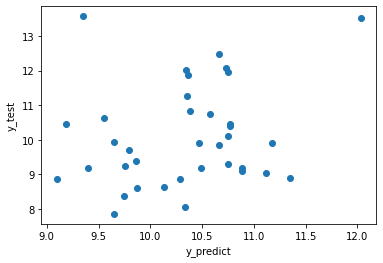

In [39]:
import matplotlib.pyplot as plt # 図の描画用のライブラリ
import seaborn as sns # データ可視化ライブラリ

# Jupyter notebook上に図表を表示する設定
%matplotlib inline

plt.xlabel("y_predict")
plt.ylabel("y_test")
plt.scatter(y_pred, y_test)
plt.savefig("tbs_plot.png",bbox_inches='tight')
plt.show()

In [40]:
# 相関係数を計算
correlation_coefficient = np.corrcoef(y_pred, y_test)[0, 1]
print(correlation_coefficient)

0.23334565122577128


#### 予測

In [41]:
from sentence_transformers import SentenceTransformer
#入力テキストをベクトルに変換
list_input_text = ["文房具好きも必見！今回のテーマは「手作りインクの世界」。市販のペンやインクでは物足りないというこだわり派に、インクを自分で作り上げる楽しみを紹介します。ゲストは、自然の植物や食品を使って独自のインクを作り続けるインクアーティストの佐藤さん。葉っぱや果物、さらには土まで、驚きの素材から美しい色を生み出す方法を実演しながら紹介します。マツコも初めて見るインクの材料に興味津々！手作りインクで書いた文字の美しさに、思わず感動の声を上げるシーンも見逃せません。色の化学反応に隠された驚きの秘密とは？"]

embedding_model = SentenceTransformer("cl-nagoya/sup-simcse-ja-base")

In [42]:
import re

# '番組内容' と '出演者' 以降を削除
def clean_description(text):
    # '出演者' 以降を削除
    text = re.split(r'-- 出演者 --', text)[0]
    # '番組内容' という文字列を削除
    text = re.sub(r'番組内容\s*', '', text)
    
    text = neologdn.normalize(text)
    
    return text

# 各行に対してクリーンアップ処理を実行
text = clean_description(list_input_text[0])
print(text)


文房具好きも必見!今回のテーマは「手作りインクの世界」。市販のペンやインクでは物足りないというこだわり派に、インクを自分で作り上げる楽しみを紹介します。ゲストは、自然の植物や食品を使って独自のインクを作り続けるインクアーティストの佐藤さん。葉っぱや果物、さらには土まで、驚きの素材から美しい色を生み出す方法を実演しながら紹介します。マツコも初めて見るインクの材料に興味津々!手作りインクで書いた文字の美しさに、思わず感動の声を上げるシーンも見逃せません。色の化学反応に隠された驚きの秘密とは?


In [45]:
embedding = embedding_model.encode(text)

embedding = embedding.reshape(1,-1)

pred = lr.predict(embedding)

print("予想の世帯視聴率",pred)

pred = ab.predict(embedding)

print("abの予測世帯視聴率",pred)

予想の世帯視聴率 [10.59138163]
abの予測世帯視聴率 [10.36795163]


In [33]:
print(embedding)

[[ 9.12252426e-01 -5.21715403e-01 -2.20211670e-01  8.91542315e-01
  -7.32365012e-01 -5.26759982e-01 -3.54716808e-01 -3.94206822e-01
  -6.88212693e-01  3.18183362e-01 -7.65969083e-02 -1.14633972e-02
  -8.05780366e-02 -9.65221047e-01  3.75115573e-01 -2.66116917e-01
   4.61545974e-01  2.57736534e-01 -9.55637634e-01  5.41132569e-01
   6.88901544e-01  5.13418317e-01  2.55965739e-01 -5.35251796e-01
  -1.24210484e-01  9.60960865e-01 -4.23310697e-02 -1.75757736e-01
  -1.05487359e+00  7.05233574e-01 -4.40030307e-01 -5.40883064e-01
   1.00173867e+00 -5.22311926e+00  7.17123151e-02  1.71164915e-01
   1.37264371e-01  9.29392278e-01  1.37808276e-02  5.07794730e-02
  -7.00623319e-02 -6.06831074e-01 -3.48664790e-01  3.80613118e-01
  -6.45370722e-01 -1.44491446e+00  4.58912134e-01  3.29185054e-02
  -4.14116710e-01 -1.24344289e+00 -6.28931940e-01  6.10910511e+00
  -7.72664905e-01  8.97632420e-01  4.08196449e-01  3.48565966e-01
  -5.42393446e-01  3.34417671e-01  5.60974300e-01  1.46850812e+00
  -1.41058